In [1]:
import os
import cv2
import numpy as np

In [2]:
from matplotlib import pyplot as plt
modelFile = "/home/shreyanka/Documents/Clique/weights.caffemodel"
configFile = "/home/shreyanka/Documents/Clique/deploy.prototxt"
net = cv2.dnn.readNetFromCaffe(configFile, modelFile)


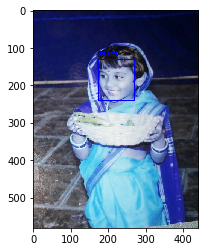

In [5]:
image = cv2.imread('/home/shreyanka/Documents/Clique/Input.jpg')
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()
bboxes = []
for i in range(0,detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    text = "{:.2f}%".format(confidence * 100)
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),(0, 0, 255), 2)
        cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

plt.imshow(image)
plt.show()
# cv2.imshow("Output", image)
# cv2.waitKey(0)